### 第一步、缺失值、异常值处理

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 29 09:31:38 2019

@author: l'x
"""
import pandas as pd
import numpy as np
data=pd.read_csv(r"D:\研一下\数据科学导论\happiness(1)\happiness\happiness_train_complete.csv",engine='python')
data.shape ##8000个观测，140个特征

set(data['happiness'])
data=data.loc[data['happiness']!=-8]
data.shape

data_type=data.dtypes.reset_index()  
data_type.columns = ["Count", "Column Type"]
data_type=data_type.groupby("Column Type").aggregate('count').reset_index()
print(data_type) ##136个数值型变量，4个字符型变量

#pd.DataFrame(data.dtypes).to_csv('D:\研一课程\下学期\数据科学导论\happiness\Type.csv')

##删除id
drop1=["id"]
data=data.drop(drop1,axis=1)

##是否有缺失,有25个变量存在缺失
count=0
for columname in data.columns:
    if data[columname].count() != len(data):
         rate = 1-data[columname].count()/len(data)
         count+=1
         print('列名："{}", 缺失比例:"{}"'.format(columname,round(rate,3)))
print('有{}个变量存在缺失'.format(count))

count=0
drop2=[]
for columname in data.columns:
    if data[columname].count() != len(data):
         rate = 1-data[columname].count()/len(data)
         if rate>=0.8:
             count+=1
             drop2.append(columname)
             print('列名："{}", 缺失比例:"{}"'.format(columname,round(rate,3)))
print('有{}个变量缺失率达到80%,予以删除'.format(count))
##有四个变量缺失率达到80%，直接删除

##survey_time、edu_other、property_other、invest_other
data=data.drop(drop2,axis=1)
data.columns

##将数据框中所有负值赋为缺失
data_num=data.drop(['survey_time'],axis=1)
data_num[data_num<0] = np.nan

count=0
for columname in data_num.columns:
    if data_num[columname].count() != len(data_num):
         rate = 1-data_num[columname].count()/len(data_num)
         count+=1
         print('列名："{}", 缺失比例:"{}"'.format(columname,round(rate,5)))
print('有{}个变量存在缺失'.format(count))

count=0
drop2=[]
for columname in data_num.columns:
    if data_num[columname].count() != len(data_num):
         rate = 1-data_num[columname].count()/len(data_num)
         if rate>=0.8:
             count+=1
             drop2.append(columname)
             print('列名："{}", 缺失比例:"{}"'.format(columname,round(rate,5)))
print('有{}个变量缺失率达到80%,予以删除'.format(count))

data_type=data_num.dtypes.reset_index()  
data_type.columns = ["Count", "Column Type"]
data_type=data_type.groupby("Column Type").aggregate('count').reset_index()
print(data_type) ##134个数值型变量

data=pd.concat([data_num,data['survey_time']],axis=1)

data['survey_time']=pd.to_datetime(data['survey_time'])
data['Age']=data['survey_time'].dt.year-data['birth']
data['s_Age']=data['survey_time'].dt.year-data['s_birth']

data['Age_diff']=abs(data['Age']-data['s_Age'])
data1=data


drop3=['survey_time','birth','s_birth','s_Age']
data=data.drop(drop3,axis=1)

#data.describe().to_csv('D:\研一课程\下学期\数据科学导论\happiness\DataDescribe.csv')


  Column Type  Count
0       int64    111
1     float64     25
2      object      4
列名："edu_other", 缺失比例:"1.0"
列名："edu_status", 缺失比例:"0.14"
列名："edu_yr", 缺失比例:"0.247"
列名："join_party", 缺失比例:"0.897"
列名："property_other", 缺失比例:"0.992"
列名："hukou_loc", 缺失比例:"0.001"
列名："social_neighbor", 缺失比例:"0.1"
列名："social_friend", 缺失比例:"0.1"
列名："work_status", 缺失比例:"0.631"
列名："work_yr", 缺失比例:"0.631"
列名："work_type", 缺失比例:"0.631"
列名："work_manage", 缺失比例:"0.631"
列名："family_income", 缺失比例:"0.0"
列名："invest_other", 缺失比例:"0.996"
列名："minor_child", 缺失比例:"0.133"
列名："marital_1st", 缺失比例:"0.104"
列名："s_birth", 缺失比例:"0.215"
列名："marital_now", 缺失比例:"0.221"
列名："s_edu", 缺失比例:"0.215"
列名："s_political", 缺失比例:"0.215"
列名："s_hukou", 缺失比例:"0.215"
列名："s_income", 缺失比例:"0.215"
列名："s_work_exper", 缺失比例:"0.215"
列名："s_work_status", 缺失比例:"0.68"
列名："s_work_type", 缺失比例:"0.68"
有25个变量存在缺失
列名："edu_other", 缺失比例:"1.0"
列名："join_party", 缺失比例:"0.897"
列名："property_other", 缺失比例:"0.992"
列名："invest_other", 缺失比例:"0.996"
有4个变量缺失率达到80%,予以删除
列名："nationality", 

In [2]:
data.head()

,happiness,survey_type,province,city,county,gender,nationality,religion,religion_freq,edu,...,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9,Age,Age_diff
0,4,1,12,32,59,1,1.0,1.0,1.0,11.0,...,60.0,50.0,50.0,30.0,30.0,50.0,50.0,50.0,56,1.0
1,4,2,18,52,85,1,1.0,1.0,1.0,12.0,...,70.0,70.0,80.0,85.0,70.0,90.0,60.0,60.0,23,NaN
2,4,2,29,83,126,2,1.0,0.0,3.0,4.0,...,80.0,75.0,79.0,80.0,90.0,90.0,90.0,75.0,48,1.0
3,5,2,10,28,51,2,1.0,1.0,1.0,3.0,...,90.0,70.0,80.0,80.0,90.0,90.0,80.0,80.0,72,NaN
4,4,1,7,18,36,2,1.0,1.0,1.0,12.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,21,NaN


### 第二步、特征工程与描述性统计

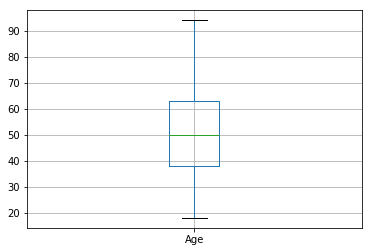

In [3]:
%matplotlib inline
##看年龄分布，存在异常值
import matplotlib.pyplot as plt
age=pd.DataFrame(data['Age'])
age.boxplot()

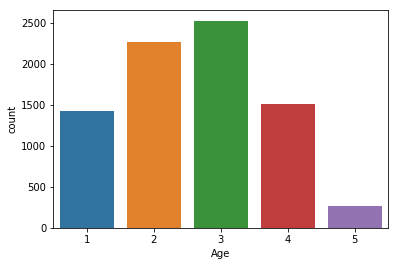

In [4]:
##list1=[str(i)+'Age' for i in ['','s_','f_','m_']]
'''
data=data.loc[(data['Age']<100)|(data['Age'].isnull())]
data=data.loc[(data['s_Age']<100)|(data['s_Age'].isnull())]
data=data.loc[(data['f_Age']<100)|(data['f_Age'].isnull())]
data=data.loc[(data['m_Age']<100)|(data['m_Age'].isnull())]
age=pd.DataFrame(data=[data['Age'],data['s_Age'],data['f_Age'],data['m_Age']]).T
age.boxplot()
'''

import seaborn as sns
##年龄分布,无缺失
data.loc[data['Age']<=16,'Age']=0
data.loc[(data['Age'] > 16)&(data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32)&(data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48)&(data['Age'] <= 64), 'Age'] = 3
data.loc[(data['Age'] > 64)&(data['Age'] <= 80), 'Age'] = 4
data.loc[ data['Age'] > 80, 'Age'] = 5
data.groupby('Age').Age.count()
sns.countplot('Age',data=data)

(array([2.000e+00, 1.000e+00, 7.460e+02, 2.298e+03, 2.098e+03, 1.806e+03,
        8.870e+02, 1.300e+02, 1.300e+01, 7.000e+00]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 10 Patch objects>)

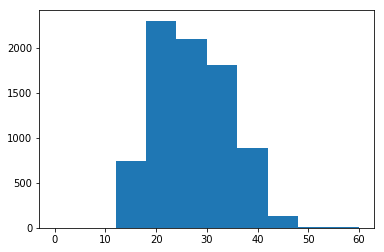

In [5]:
#悠闲指数
leisure_fea_lis = []
leisure_fea_lis = ['leisure_'+str(i) for i in range(1,13)]
recode_leisure = {1:5,2:4,3:3,4:2,5:1}
for col in leisure_fea_lis:
    data[col] = data[col].map(recode_leisure )
data['leisure_sum'] = data[leisure_fea_lis].T.sum() #skew
plt.hist(data['leisure_sum'])
#lei=pd.DataFrame(data['leisure_sum'])
#lei.boxplot()

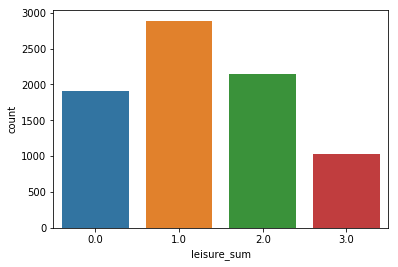

In [7]:
data.loc[(data['leisure_sum'] > 0)&(data['leisure_sum'] <=20), 'leisure_sum'] = 0
data.loc[(data['leisure_sum'] > 20)&(data['leisure_sum'] <= 28), 'leisure_sum'] = 1
data.loc[(data['leisure_sum'] > 28)&(data['leisure_sum'] <= 35), 'leisure_sum'] = 2
data.loc[(data['leisure_sum'] > 35), 'leisure_sum'] = 3
sns.countplot('leisure_sum',data=data)

(array([ 176.,   76.,  113.,  207.,  456., 1051., 1840., 2337., 1300.,
         432.]),
 array([  0.,  90., 180., 270., 360., 450., 540., 630., 720., 810., 900.]),
 <a list of 10 Patch objects>)

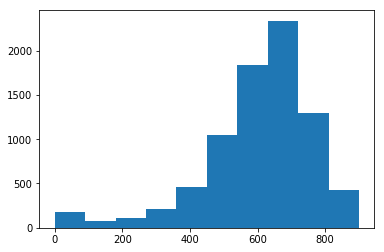

In [8]:
#满意指数
public_service_fea_lis = ['public_service_'+str(i) for i in range(1,10)]
data['public_sum'] = data[public_service_fea_lis].T.sum() #skew
plt.hist(data['public_sum'])

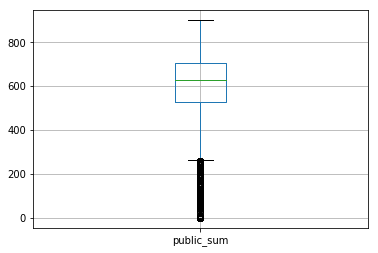

In [9]:
pub=pd.DataFrame(data['public_sum'])
pub.boxplot()

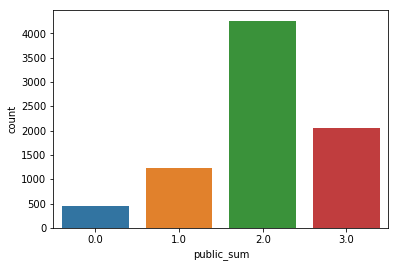

In [10]:
data.loc[(data['public_sum'] > 0)&(data['public_sum'] <= 300), 'public_sum'] = 0
data.loc[(data['public_sum'] > 300)&(data['public_sum'] <= 500), 'public_sum'] = 1
data.loc[(data['public_sum'] > 500)&(data['public_sum'] <= 700), 'public_sum'] = 2
data.loc[(data['public_sum'] > 700), 'public_sum'] = 3
sns.countplot('public_sum',data=data)

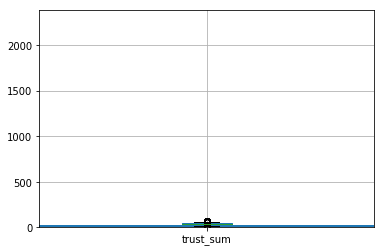

In [11]:
#信任指数
trust_fea_lis = ['trust_'+str(i) for i in range(1,14)]
data['trust_sum'] = data[trust_fea_lis].T.sum() #skew
plt.hist(data['trust_sum'])
tru=pd.DataFrame(data['trust_sum'])
tru.boxplot()

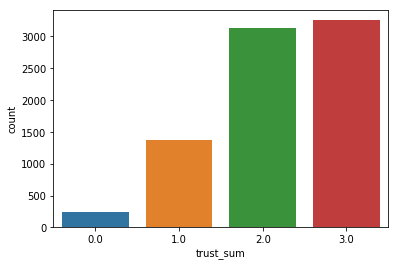

In [12]:
data.loc[(data['trust_sum'] > 0)&(data['trust_sum'] <= 20), 'trust_sum'] = 0
data.loc[(data['trust_sum'] > 20)&(data['trust_sum'] <= 30), 'trust_sum'] = 1
data.loc[(data['trust_sum'] > 30)&(data['trust_sum'] <= 40), 'trust_sum'] = 2
data.loc[(data['trust_sum'] > 40), 'trust_sum'] = 3
sns.countplot('trust_sum',data=data)

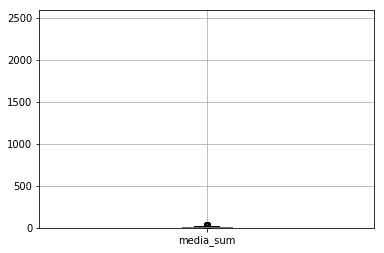

In [13]:
##信息指数
media_fea_lis = ['media_'+str(i) for i in range(1,7)]
data['media_sum'] = data[media_fea_lis].T.sum() #skew
plt.hist(data['media_sum'])
med=pd.DataFrame(data['media_sum'])
med.boxplot()

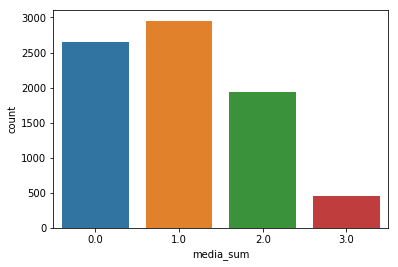

In [14]:
data.loc[(data['media_sum'] > 0)&(data['media_sum'] <= 10), 'media_sum'] = 0
data.loc[(data['media_sum'] > 10)&(data['media_sum'] <= 15), 'media_sum'] = 1
data.loc[(data['media_sum'] > 15)&(data['media_sum'] <= 20), 'media_sum'] = 2
data.loc[(data['media_sum'] > 20), 'media_sum'] = 3
sns.countplot('media_sum',data=data)

drop4=leisure_fea_lis+public_service_fea_lis+trust_fea_lis+media_fea_lis
data=data.drop(drop4,axis=1)

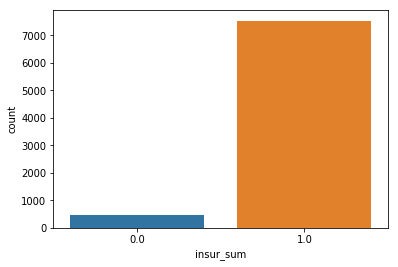

In [15]:
##是否参加社会保障
insur_fea_lis=['insur_'+str(i) for i in range(1,5)]
data['insur_sum'] = data[insur_fea_lis].T.sum() 
data.loc[(data['insur_sum'] !=8), 'insur_sum'] = 1
data.loc[(data['insur_sum'] ==8), 'insur_sum'] = 0
sns.countplot('insur_sum',data=data)

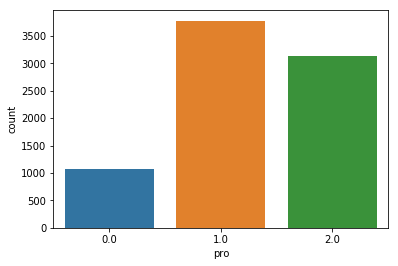

In [16]:
##房产是否归自己所有
pro_fea_lis=['property_'+str(i) for i in range(1,9)]
data.loc[(data['property_8'] ==1), 'pro'] =0
data.loc[(data['property_1'] ==1), 'pro'] =1
data.loc[((data['property_1'] !=1)&(data['property_8'] !=1)), 'pro'] =2
sns.countplot('pro',data=data)

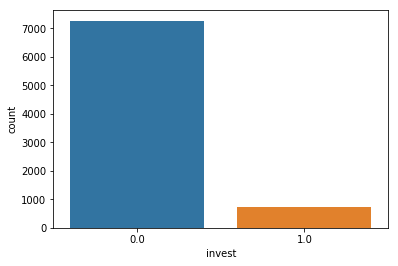

In [17]:
##是否进行投资
inv_fea_lis=['invest_'+str(i) for i in range(1,9)]
data.loc[(data['invest_1'] ==1), 'invest'] =0
data.loc[(data['invest_1'] !=1), 'invest'] =1
sns.countplot('invest',data=data)

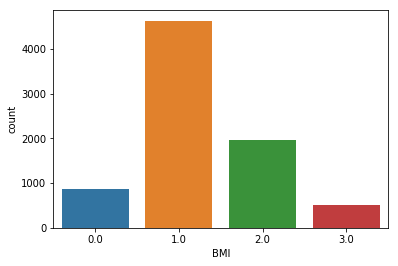

In [18]:
##身高体重变为BMI
bmi_lis=['weight_jin','height_cm']
data['BMI']=(data['weight_jin']/2)/(data['height_cm']/100)**2
plt.hist(data['BMI'])
data.loc[data['BMI'] <18.5, 'BMI'] =0
data.loc[(data['BMI'] >=18.5)&(data['BMI'] <24), 'BMI'] =1
data.loc[(data['BMI'] >=24)&(data['BMI'] <28), 'BMI'] =2
data.loc[(data['BMI'] >=28), 'BMI'] =3
sns.countplot('BMI',data=data)

In [19]:
drop5=insur_fea_lis+pro_fea_lis+inv_fea_lis+bmi_lis
data=data.drop(drop5,axis=1)

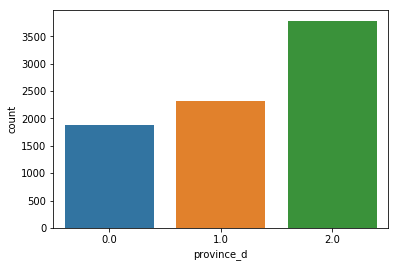

In [20]:
##80个特征
##0-西部，1-中部，2-东部
data.loc[(data['province']==28)|(data['province']==6)|(data['province']==2)|
         (data['province']==26)|(data['province']==14)|(data['province']==25)|
         (data['province']==29)|(data['province']==23)|(data['province']==8)|
         (data['province']==30)|(data['province']==13),'province_d'] =0
data.loc[(data['province']==3)|(data['province']==17)|(data['province']==11)|
         (data['province']==9)|(data['province']==16)|(data['province']==22)
         |(data['province']==21)|(data['province']==18),'province_d']=1
data.loc[(data['province']==1)|(data['province']==4)|(data['province']==5)|
         (data['province']==7)|(data['province']==10)|(data['province']==12)
         |(data['province']==15)|(data['province']==19)|(data['province']==20)
         |(data['province']==24)|(data['province']==27)|(data['province']==31),'province_d']=2  
sns.countplot('province_d',data=data)


drop6=['city','county']
data=data.drop(drop6,axis=1)

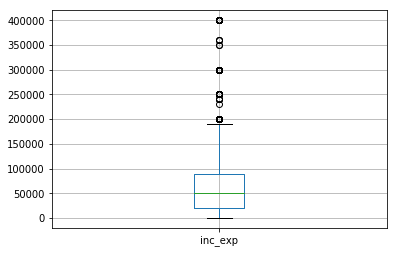

In [33]:
##收入缺失值插补
inc=pd.DataFrame(data[data['inc_exp']<500000]['inc_exp'])
inc.boxplot()

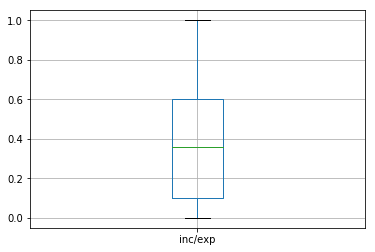

In [23]:
round(data['income'].describe(),2)

data['income']=data['income'].fillna(data['income'].median())
data['s_income']=data['s_income'].fillna(data['s_income'].median())
data['inc_exp']=data['inc_exp'].fillna(data['inc_exp'].median())
data['family_income']=data['family_income'].fillna(data['family_income'].median())

data['inc/exp']=round(data['income']/data['inc_exp'],2)
data['inc/fam_inc']=round(data['income']/data['family_income'],2)

drop7=['s_income','inc_exp','family_income']
data=data.drop(drop7,axis=1)

data=data.loc[data['inc/exp']<=1]
inc_e=pd.DataFrame(data['inc/exp'])
inc_e.boxplot()

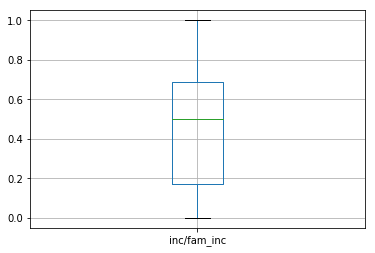

In [24]:
data=data.loc[data['inc/fam_inc']<=1]
inc_f=pd.DataFrame(data['inc/fam_inc'])
inc_f.boxplot()

(array([5.331e+03, 1.350e+03, 2.880e+02, 8.600e+01, 2.500e+01, 7.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   3. ,  132.7,  262.4,  392.1,  521.8,  651.5,  781.2,  910.9,
        1040.6, 1170.3, 1300. ]),
 <a list of 10 Patch objects>)

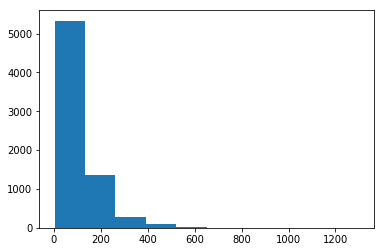

In [25]:
##住房面积
plt.hist(data['floor_area'])

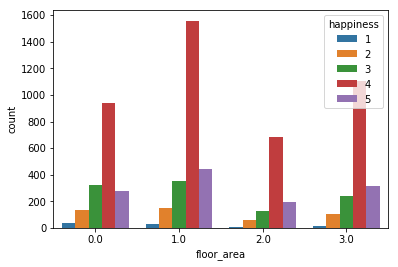

In [26]:
data['floor_area'].describe()
data.loc[(data['floor_area'] > 0)&(data['floor_area'] <= 60), 'floor_area'] = 0
data.loc[(data['floor_area'] > 60)&(data['floor_area'] <= 100), 'floor_area'] = 1
data.loc[(data['floor_area'] > 100)&(data['floor_area'] <= 130), 'floor_area'] = 2
data.loc[(data['floor_area'] > 130), 'floor_area'] = 3
sns.countplot('floor_area',hue='happiness',data=data)

In [27]:
##等级
data['class_10_after_diff'] = (data['class_10_after'] - data['class'])
data['class_10_before_diff'] = (data['class'] - data['class_10_before'])

##子女数
data['children']=data['son']+data['daughter']
drop8=['class_10_after','class_10_before','class','class_14','son',
       'daughter','invest_0','property_0','marital_1st','marital_now','edu_yr']
data=data.drop(drop8,axis=1)

##字符型字段
str=['survey_type' ,'gender' ,'nationality' ,'religion' ,'edu_status' ,'political',
     'hukou' ,'hukou_loc' ,'work_exper' ,'work_status' ,'work_type' ,'work_manage',
     'car' ,'marital' ,'s_political' ,'s_hukou' ,'s_work_exper' ,'s_work_status',
     's_work_type' ,'f_political' ,'f_work_14' ,'m_political' ,'m_work_14',
     'invest' ,'pro' ,'province_d']

In [28]:
data.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,edu_status,income,...,insur_sum,pro,invest,BMI,province_d,inc/exp,inc/fam_inc,class_10_after_diff,class_10_before_diff,children
0,4,1,12,1,1.0,1.0,1.0,11.0,4.0,20000.0,...,1.0,1.0,0.0,2.0,2.0,0.40,0.33,0.0,0.0,1.0
1,4,2,18,1,1.0,1.0,1.0,12.0,4.0,20000.0,...,1.0,2.0,0.0,1.0,1.0,0.40,0.50,2.0,2.0,0.0
2,4,2,29,2,1.0,0.0,3.0,4.0,4.0,2000.0,...,1.0,1.0,0.0,1.0,0.0,0.02,0.25,1.0,1.0,2.0
3,5,2,10,2,1.0,1.0,1.0,3.0,4.0,6420.0,...,0.0,2.0,0.0,3.0,2.0,0.64,0.54,2.0,0.0,5.0
4,4,1,7,2,1.0,1.0,1.0,12.0,1.0,20000.0,...,1.0,2.0,0.0,1.0,2.0,0.10,0.50,0.0,0.0,0.0


In [29]:
##卡方检验
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi_model=SelectKBest(chi2)
count=0
for columname in str:
    if data[columname].count() != len(data):
         rate = 1-data[columname].count()/len(data)
         count+=1
         print('列名："{}", 缺失比例:"{}"'.format(columname,round(rate,5)))
print('有{}个变量存在缺失'.format(count))

列名："nationality", 缺失比例:"0.00225"
列名："religion", 缺失比例:"0.01198"
列名："edu_status", 缺失比例:"0.14346"
列名："political", 缺失比例:"0.00507"
列名："hukou_loc", 缺失比例:"0.00056"
列名："work_status", 缺失比例:"0.63895"
列名："work_type", 缺失比例:"0.64459"
列名："work_manage", 缺失比例:"0.64318"
列名："car", 缺失比例:"0.0007"
列名："s_political", 缺失比例:"0.21463"
列名："s_hukou", 缺失比例:"0.21421"
列名："s_work_exper", 缺失比例:"0.21266"
列名："s_work_status", 缺失比例:"0.67728"
列名："s_work_type", 缺失比例:"0.67954"
列名："f_political", 缺失比例:"0.02508"
列名："f_work_14", 缺失比例:"0.03594"
列名："m_political", 缺失比例:"0.01818"
列名："m_work_14", 缺失比例:"0.03551"
有18个变量存在缺失


In [30]:
data[str]=data[str].fillna(99)
chi_model.fit_transform(data[str],data[['happiness']])
chi_model.pvalues_[chi_model.pvalues_>1e-15]=1
b=sorted(enumerate(chi_model.pvalues_), key=lambda x:x[1])
import math
index_fea=[]
for i in range(len(b)):
    if b[i][1]!=1 and not math.isnan(b[i][1]):
        index_fea.append(b[i][0])
len(index_fea)

15

In [31]:
num=['happiness','religion_freq','edu','floor_area', 
                  'health', 'health_problem','depression','socialize', 
                  'relax','learn','social_neighbor','social_friend', 
                  'socia_outing', 'equity', 'work_yr', 'family_m',
                  'family_status','house','children','minor_child','s_edu',
                  'f_birth','f_edu','m_birth', 'm_edu','status_peer',
                  'status_3_before','view','inc_ability', 'neighbor_familiarity', 
                  'Age', 'Age_diff', 'leisure_sum', 'public_sum','trust_sum', 
                  'media_sum','insur_sum', 'BMI','inc/exp', 'inc/fam_inc', 'class_10_before_diff', 
                  'class_10_after_diff']

count=0
for columname in num:
    if data[columname].count() != len(data):
         rate = 1-data[columname].count()/len(data)
         count+=1
         print('列名："{}", 缺失比例:"{}"'.format(columname,round(rate,5)))
print('有{}个变量存在缺失'.format(count))

列名："religion_freq", 缺失比例:"0.00197"
列名："edu", 缺失比例:"0.00099"
列名："health", 缺失比例:"0.00042"
列名："health_problem", 缺失比例:"0.00493"
列名："depression", 缺失比例:"0.00183"
列名："socialize", 缺失比例:"0.00056"
列名："relax", 缺失比例:"0.00183"
列名："learn", 缺失比例:"0.0024"
列名："social_neighbor", 缺失比例:"0.09667"
列名："social_friend", 缺失比例:"0.10062"
列名："socia_outing", 缺失比例:"0.0062"
列名："equity", 缺失比例:"0.00437"
列名："work_yr", 缺失比例:"0.6553"
列名："family_m", 缺失比例:"0.00211"
列名："family_status", 缺失比例:"0.00423"
列名："house", 缺失比例:"0.01325"
列名："children", 缺失比例:"0.00141"
列名："minor_child", 缺失比例:"0.13529"
列名："s_edu", 缺失比例:"0.21646"
列名："f_birth", 缺失比例:"0.4239"
列名："f_edu", 缺失比例:"0.07455"
列名："m_birth", 缺失比例:"0.40403"
列名："m_edu", 缺失比例:"0.05947"
列名："status_peer", 缺失比例:"0.0055"
列名："status_3_before", 缺失比例:"0.00578"
列名："view", 缺失比例:"0.02508"
列名："inc_ability", 缺失比例:"0.12091"
列名："neighbor_familiarity", 缺失比例:"0.00113"
列名："Age_diff", 缺失比例:"0.21266"
列名："class_10_before_diff", 缺失比例:"0.01409"
列名："class_10_after_diff", 缺失比例:"0.05665"
有31个变量存在缺失


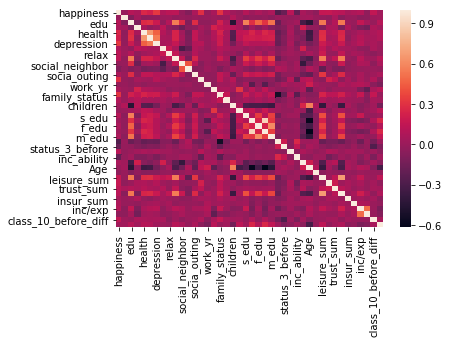

In [32]:
for i in num:
    data[i]=data[i].fillna(int(data[i].median()))

sns.heatmap(data[num].corr())
#Fig=plt.gcf
#Fig.set_size_inches(12,10)

#data[num].corr().to_csv('D:\研一课程\下学期\数据科学导论\happiness\corr.csv')

### 第三步、一些有趣的描述

In [33]:
data.head()

,happiness,survey_type,province,gender,nationality,religion,religion_freq,edu,edu_status,income,...,insur_sum,pro,invest,BMI,province_d,inc/exp,inc/fam_inc,class_10_after_diff,class_10_before_diff,children
0,4,1,12,1,1.0,1.0,1.0,11.0,4.0,20000.0,...,1.0,1.0,0.0,2.0,2.0,0.40,0.33,0.0,0.0,1.0
1,4,2,18,1,1.0,1.0,1.0,12.0,4.0,20000.0,...,1.0,2.0,0.0,1.0,1.0,0.40,0.50,2.0,2.0,0.0
2,4,2,29,2,1.0,0.0,3.0,4.0,4.0,2000.0,...,1.0,1.0,0.0,1.0,0.0,0.02,0.25,1.0,1.0,2.0
3,5,2,10,2,1.0,1.0,1.0,3.0,4.0,6420.0,...,0.0,2.0,0.0,3.0,2.0,0.64,0.54,2.0,0.0,5.0
4,4,1,7,2,1.0,1.0,1.0,12.0,1.0,20000.0,...,1.0,2.0,0.0,1.0,2.0,0.10,0.50,0.0,0.0,0.0


In [34]:
data_plot = data.copy()

In [35]:
#幸福度
from pyecharts.charts import Bar
bar = (
    Bar()
    .add_xaxis(list(data_plot['happiness'].value_counts().index))
    .add_yaxis("happiness", list(data_plot['happiness'].value_counts()))
)
bar.render_notebook()

In [36]:
#农村、城市幸福度比较
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.globals import ChartType, SymbolType
def bar_stack1() -> Bar:
    c = (
        Bar()
        .add_xaxis([1,2,3,4,5])
        .add_yaxis("农村", list(data_plot.loc[data_plot.survey_type==2,'happiness'].value_counts().sort_index()/list(data_plot['survey_type'].value_counts().sort_index())[1]), stack="stack1")
        .add_yaxis("城市", list(data_plot.loc[data_plot.survey_type==1,'happiness'].value_counts().sort_index()/list(data_plot['survey_type'].value_counts().sort_index())[0]), stack="stack1")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        #.set_global_opts(title_opts=opts.TitleOpts(title="城市-农村幸福度对比"))
    )
    return c
c = bar_stack1()
c.render_notebook()

In [37]:
#不同地方的平均幸福度
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType
provinces = ['上海','云南','内蒙古','北京','吉林','四川','天津','宁夏','安徽','山东','山西','广东','广西','新疆','江苏',
             '江西','河北','河南','浙江','海南'
             ,'湖北','湖南','甘肃','福建','西藏','贵州','辽宁','重庆','陕西','青海','黑龙江']
provinces = [provinces[i-1] for i in sorted(data_plot['province'].value_counts().index)]
happiness=list(100*(data_plot.groupby('province').mean()['happiness']-data_plot.groupby('province').mean()['happiness'].min())/(data_plot.groupby('province').mean()['happiness'].max()-data_plot.groupby('province').mean()['happiness'].min()))
def geo_base() -> Geo:
    c = (
        Geo()
        .add_schema(maptype="china")
        .add("happiness",[list(z) for z in zip(provinces,happiness)],type_=ChartType.EFFECT_SCATTER)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(is_piecewise=True),
            #title_opts=opts.TitleOpts(title="全国各地幸福感"),
        )
    )
    return c
c = geo_base()
c.render_notebook()

In [38]:
prov_rank=dict(zip(provinces,data_plot.groupby('province',as_index=True).mean()['happiness'].sort_index()))
sorted(prov_rank.items(), key=lambda d:d[1],reverse = True)

[('河北', 4.109452736318408),
 ('北京', 4.086309523809524),
 ('内蒙古', 4.081967213114754),
 ('山东', 4.07027027027027),
 ('吉林', 4.00314465408805),
 ('山西', 4.0),
 ('浙江', 3.986348122866894),
 ('青海', 3.9833333333333334),
 ('江苏', 3.9793510324483776),
 ('辽宁', 3.9747292418772564),
 ('河南', 3.968503937007874),
 ('甘肃', 3.956896551724138),
 ('天津', 3.9408602150537635),
 ('安徽', 3.8995983935742973),
 ('江西', 3.8496932515337425),
 ('福建', 3.839080459770115),
 ('黑龙江', 3.825268817204301),
 ('上海', 3.7746031746031745),
 ('陕西', 3.7716535433070866),
 ('贵州', 3.768292682926829),
 ('广东', 3.767857142857143),
 ('云南', 3.7490196078431373),
 ('湖南', 3.7015873015873018),
 ('宁夏', 3.6885245901639343),
 ('湖北', 3.687022900763359),
 ('四川', 3.6586666666666665),
 ('重庆', 3.611464968152866),
 ('广西', 3.6066945606694563)]

In [39]:
#不同受教育程度的幸福感
edu = ['没有受过任何教育',' 私塾、扫盲班','小学','初中', '职业高中', '普通高中','中专', '技校', '大学专科（成人高等教育）','大学专科（正规高等教育）','大学本科（成人高等教育）', '大学本科（正规高等教育）','研究生及以上','其他']
happiness = list(data_plot.groupby('edu').mean()['happiness'])
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Funnel, Page

def funnel_base() -> Funnel:
    c = (
        Funnel()
        .add("教育程度", [list(z) for z in zip(edu,happiness)],label_opts=opts.LabelOpts(position="inside"))
        #.set_global_opts(title_opts=opts.TitleOpts(title="不同教育程度幸福感", pos_bottom=True,pos_right=True))
    )
    return c
c = funnel_base()
c.render_notebook()

私塾班，扫盲班的人幸福感高是老人

In [40]:
data_plot.groupby('edu').mean()['happiness']

edu
1.0     3.761653
2.0     4.052632
3.0     3.783374
4.0     3.843003
5.0     3.882353
6.0     3.927811
7.0     3.946032
8.0     3.783784
9.0     3.993631
10.0    4.039039
11.0    3.913669
12.0    4.070423
13.0    4.114286
14.0    3.666667
Name: happiness, dtype: float64

In [41]:
#不同年龄的幸福感
age = ['16岁及以下','17-32岁','33-48岁','49-64岁','65-80岁','80岁及以上']
happiness = list(data_plot.groupby('Age').mean()['happiness'])
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Funnel, Page

def funnel_base() -> Funnel:
    c = (
        Funnel()
        .add("年龄", [list(z) for z in zip(age,happiness)],label_opts=opts.LabelOpts(position="inside"))
        #.set_global_opts(title_opts=opts.TitleOpts(title="不同年龄幸福感",pos_right=True))
    )
    return c
c = funnel_base()
c.render_notebook()

In [42]:
#实际收入-幸福度data['income']
from pyecharts import options as opts
from pyecharts.charts import Boxplot
#data_plot[data_plot['income']>100000]['happiness'].value_counts().sum()收入10万以上的仅有143人
tmp = data_plot[data_plot['income']<100000]
def boxpolt_base() -> Boxplot:
    v1 = [list(tmp.loc[tmp.happiness==1,'income']),list(tmp.loc[tmp.happiness==2,'income']),
         list(tmp.loc[tmp.happiness==3,'income']),list(tmp.loc[tmp.happiness==4,'income']),
         list(tmp.loc[tmp.happiness==5,'income'])]
    c = Boxplot()
    c.add_xaxis([1,2,3,4,5]).add_yaxis("个人收入", c.prepare_data(v1))#.set_global_opts(title_opts=opts.TitleOpts(title="个人收入幸福感"))
    return c
c = boxpolt_base()
c.render_notebook()



In [43]:
#实际收入与期望收入比-幸福度data['inc/exp']
from pyecharts import options as opts
from pyecharts.charts import Boxplot
def boxpolt_base() -> Boxplot:
    v1 = [list(data_plot.loc[data_plot.happiness==1,'inc/exp']),list(data_plot.loc[data_plot.happiness==2,'inc/exp']),
         list(data_plot.loc[data_plot.happiness==3,'inc/exp']),list(data_plot.loc[data_plot.happiness==4,'inc/exp']),
         list(data_plot.loc[data_plot.happiness==5,'inc/exp'])]
    c = Boxplot()
    c.add_xaxis([1,2,3,4,5]).add_yaxis("实际收入与期望收入比", c.prepare_data(v1))#.set_global_opts(title_opts=opts.TitleOpts(title="实际收入与期望收入比幸福感"))
    return c
c = boxpolt_base()
c.render_notebook()

In [44]:
data_plot.groupby('happiness').mean()[['leisure_sum', 'public_sum','trust_sum', 'media_sum']]

,leisure_sum,public_sum,trust_sum,media_sum
happiness,,,,
1,0.806818,1.488636,1.750000,0.704545
2,0.820862,1.657596,1.918367,0.666667
3,1.133014,1.838278,2.015311,0.909091
4,1.339394,2.039627,2.219814,1.058042
5,1.445617,2.141234,2.277597,1.112013


In [45]:
#不同幸福感的指数比较
from pyecharts import options as opts
from pyecharts.charts import Page, Radar
v1 = [list(data_plot.groupby('happiness').mean()[['leisure_sum', 'public_sum','trust_sum', 'media_sum']].iloc[0,:])]
v2 = [list(data_plot.groupby('happiness').mean()[['leisure_sum', 'public_sum','trust_sum', 'media_sum']].iloc[1,:])]
v3 = [list(data_plot.groupby('happiness').mean()[['leisure_sum', 'public_sum','trust_sum', 'media_sum']].iloc[2,:])]
v4 = [list(data_plot.groupby('happiness').mean()[['leisure_sum', 'public_sum','trust_sum', 'media_sum']].iloc[3,:])]
v5 = [list(data_plot.groupby('happiness').mean()[['leisure_sum', 'public_sum','trust_sum', 'media_sum']].iloc[4,:])]
def radar_base() -> Radar:
    c = (
        Radar()
        .add_schema(
            schema=[
                opts.RadarIndicatorItem(name="悠闲指数", max_=1.5),
                opts.RadarIndicatorItem(name="满意指数", max_=2.5),
                opts.RadarIndicatorItem(name="信任指数", max_=2.5),
                opts.RadarIndicatorItem(name="信息指数", max_=1.3)
            ],shape="circle"
        )
        .add("1", v1,color="#00040e")
        .add("2", v2,color="#b3e4a1")
        .add("3", v3,color="#0047f9")
        .add("4", v4,color="#BB89FF")
        .add("5", v5,color="#FF0000")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        #.set_global_opts(title_opts=opts.TitleOpts(title="各指数幸福感"))
    )
    return c
c = radar_base()
c.render_notebook()

In [46]:
data_plot.groupby('happiness').mean()[['leisure_sum', 'public_sum','trust_sum', 'media_sum']]

,leisure_sum,public_sum,trust_sum,media_sum
happiness,,,,
1,0.806818,1.488636,1.750000,0.704545
2,0.820862,1.657596,1.918367,0.666667
3,1.133014,1.838278,2.015311,0.909091
4,1.339394,2.039627,2.219814,1.058042
5,1.445617,2.141234,2.277597,1.112013


In [47]:
prov_index= data_plot.groupby('province',as_index=True).mean()[['leisure_sum', 'public_sum','trust_sum', 'media_sum','happiness']]
prov_index.index = provinces
prov_index.sort_values(by='happiness',ascending=False)

,leisure_sum,public_sum,trust_sum,media_sum,happiness
河北,1.293532,1.850746,2.094527,0.940299,4.109453
北京,1.928571,1.955357,2.321429,1.610119,4.086310
内蒙古,0.819672,1.868852,2.344262,0.540984,4.081967
山东,1.270270,2.227027,2.518919,1.110811,4.070270
吉林,1.216981,2.072327,2.119497,0.937107,4.003145
山西,1.630058,2.138728,2.132948,1.329480,4.000000
浙江,1.607509,2.163823,2.112628,1.385666,3.986348
青海,1.566667,1.783333,2.083333,1.283333,3.983333
江苏,1.404130,1.902655,2.283186,1.129794,3.979351
辽宁,1.559567,1.902527,2.072202,1.220217,3.974729


In [48]:
import pyecharts.options as opts
from example.commons import  Faker
from pyecharts.charts import Line


def line_base() -> Line:
    c = (
        Line()
        .add_xaxis(list(prov_index.index))
        .add_yaxis("娱乐指数",list(prov_index['leisure_sum'].round(2)),markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min")]))
        .add_yaxis("满意指数",list(prov_index['public_sum'].round(2)),markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min")]))
        .add_yaxis("信任指数",list(prov_index['trust_sum'].round(2)),markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min")]))
        .add_yaxis("信息指数",list(prov_index['media_sum'].round(2)),markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min")]))
        .add_yaxis("幸福感",list(prov_index['happiness'].round(2)),color="#0047f9")
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
        )
         .set_global_opts(
            xaxis_opts=opts.AxisOpts(is_scale=True),
            yaxis_opts=opts.AxisOpts(
                is_scale=True,
                splitarea_opts=opts.SplitAreaOpts(
                    is_show=False, areastyle_opts=opts.AreaStyleOpts(opacity=1)
                ),
            ),
            datazoom_opts=[opts.DataZoomOpts(pos_bottom="-2%")],
            #title_opts=opts.TitleOpts(title="Kline-DataZoom-slider-Position"),
        )
    )
    return c

c = line_base()
c.render_notebook()

In [49]:
#存训练集
#data = data.drop(['province','income'],axis=1)
data.to_csv('D:\研一下\数据科学导论\happiness(1)\Xgboost\happiness_train6.5.csv')

### 第四步、建立模型

fold n°1
(array([   1,    2,    4, ..., 7092, 7093, 7095]), array([   0,    3,   13, ..., 7086, 7087, 7094]))
[0]	train-rmse:3.44464	valid_data-rmse:3.44883	train-myFeval:11.8656	valid_data-myFeval:11.8944
Multiple eval metrics have been passed: 'valid_data-myFeval' will be used for early stopping.

Will train until valid_data-myFeval hasn't improved in 200 rounds.
[100]	train-rmse:2.16292	valid_data-rmse:2.17328	train-myFeval:4.67823	valid_data-myFeval:4.72314
[200]	train-rmse:1.41759	valid_data-rmse:1.43845	train-myFeval:2.00957	valid_data-myFeval:2.06915
[300]	train-rmse:1.00506	valid_data-rmse:1.04074	train-myFeval:1.01015	valid_data-myFeval:1.08314
[400]	train-rmse:0.792187	valid_data-rmse:0.844849	train-myFeval:0.62756	valid_data-myFeval:0.71377
[500]	train-rmse:0.689548	valid_data-rmse:0.757239	train-myFeval:0.475477	valid_data-myFeval:0.573411
[600]	train-rmse:0.640358	valid_data-rmse:0.720283	train-myFeval:0.410058	valid_data-myFeval:0.518808
[700]	train-rmse:0.614394	valid_da

[1100]	train-rmse:0.571519	valid_data-rmse:0.682468	train-myFeval:0.326634	valid_data-myFeval:0.465763
[1200]	train-rmse:0.564321	valid_data-rmse:0.681659	train-myFeval:0.318459	valid_data-myFeval:0.464659
[1300]	train-rmse:0.557452	valid_data-rmse:0.681458	train-myFeval:0.310752	valid_data-myFeval:0.464384
[1400]	train-rmse:0.551006	valid_data-rmse:0.681431	train-myFeval:0.303608	valid_data-myFeval:0.464348
[1500]	train-rmse:0.544493	valid_data-rmse:0.681184	train-myFeval:0.296473	valid_data-myFeval:0.464012
[1600]	train-rmse:0.538062	valid_data-rmse:0.680969	train-myFeval:0.289511	valid_data-myFeval:0.463719
[1700]	train-rmse:0.532121	valid_data-rmse:0.681106	train-myFeval:0.283153	valid_data-myFeval:0.463906
[1800]	train-rmse:0.526191	valid_data-rmse:0.681376	train-myFeval:0.276877	valid_data-myFeval:0.464273
Stopping. Best iteration:
[1603]	train-rmse:0.537927	valid_data-rmse:0.680966	train-myFeval:0.289365	valid_data-myFeval:0.463715

fold n°5
(array([   0,    1,    2, ..., 7091, 

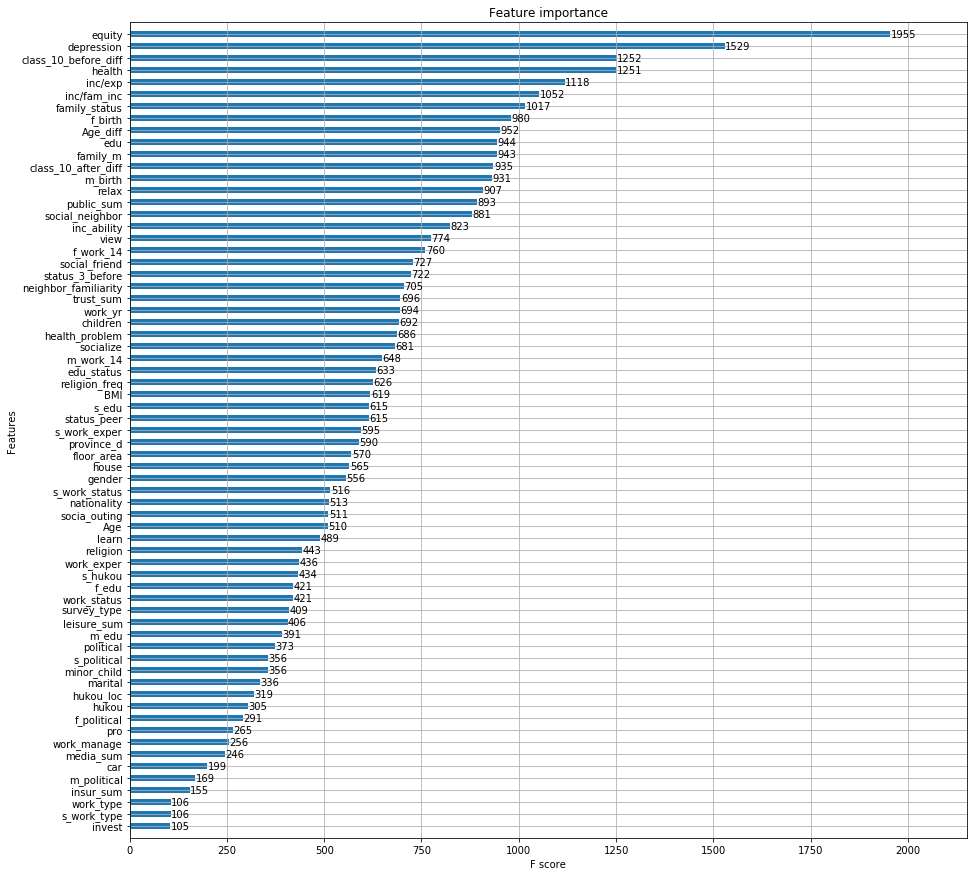

In [50]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, RepeatedKFold
from scipy import sparse
import os
os.chdir(r'D:\研一下\数据科学导论\happiness(1)\Xgboost')
df=pd.read_csv(r'happiness_train.csv')
df=df.drop(['Unnamed: 0'],axis=1)
a=df.columns
y_train=pd.DataFrame(df['happiness'])
X_train=df.drop(['happiness'],axis=1)
X_train=X_train.drop(['id'],axis=1)
X_test=pd.read_csv(r'happiness_test.csv')
X_test_id=pd.DataFrame(X_test['id'])
y_test=pd.read_csv('happiness_submit.csv')

X_test.columns
X_test=X_test.drop(['Unnamed: 0'],axis=1)
X_test=X_test.drop(['id'],axis=1)

#定义评价函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_squared_error(label,preds)
    return 'myFeval',score


xgb_params = {"booster":'gbtree','eta': 0.005, 'max_depth': 5, 'subsample': 0.7,
              'colsample_bytree': 0.8, 'objective':'reg:linear',
              'eval_metric': 'rmse', 'silent': True, 'nthread': 8}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_xgb = np.zeros(len(X_train))
predictions_xgb = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    print((trn_idx, val_idx))
    trn_data = xgb.DMatrix(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
    val_data = xgb.DMatrix(X_train.iloc[val_idx], y_train.iloc[val_idx])
    
    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=2000, evals=watchlist, early_stopping_rounds=200, verbose_eval=100, params=xgb_params,feval = myFeval)
    oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train.iloc[val_idx]), ntree_limit=clf.best_ntree_limit)
    predictions_xgb += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
    
print("CV score: {:<8.8f}".format(mean_squared_error(oof_xgb, y_train)))

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(clf,height=0.5,ax=ax,max_num_features=67)
plt.savefig(r'feature.jpg')
plt.show()

In [51]:
#画树
import xgboost as xgb
from xgboost import plot_tree
from xgboost import plotting
import matplotlib.pyplot as plt
import graphviz

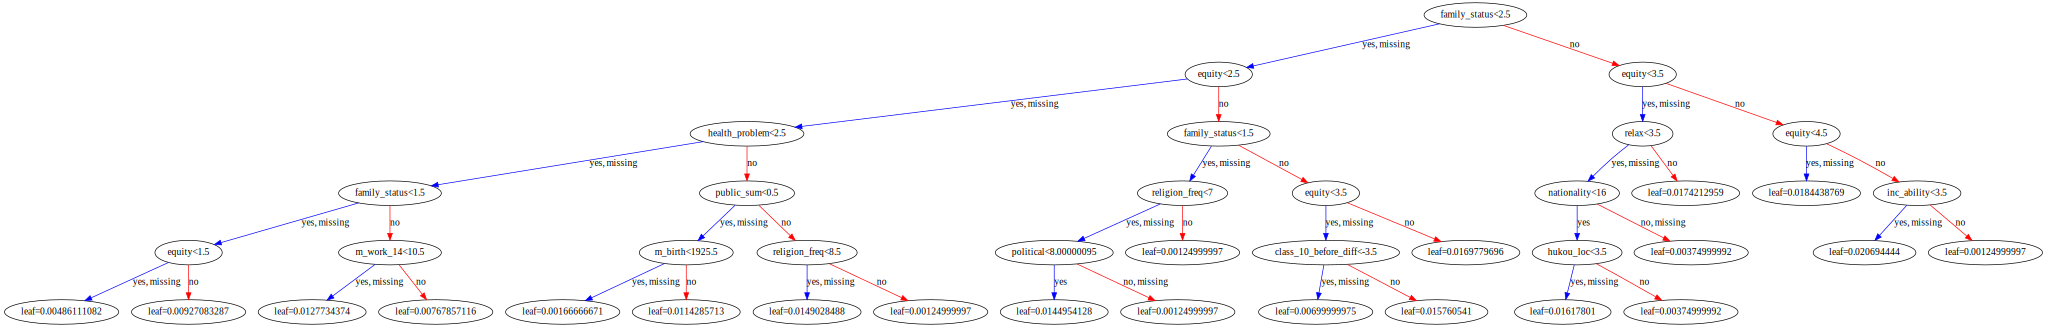

In [52]:
xgb.to_graphviz(clf)

In [53]:
#预测值
pred_df = pd.DataFrame(predictions_xgb)
pred_df['xgb_pred'] = pred_df[0]
pred_df = pred_df[['xgb_pred']] 
pred_df['xgb_pred'].describe()

count    2968.000000
mean        3.836631
std         0.444116
min         1.921333
25%         3.623324
50%         3.920511
75%         4.143356
max         4.879064
Name: xgb_pred, dtype: float64

In [54]:
pred_df.to_csv('output6.5.csv')